# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Objetivo de la práctica
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

## Parte 1: Construcción de la matriz término-documento y TF-IDF

### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
   - Frecuencia absoluta (TF)
   - TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

### TF

In [46]:
documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]
vocab = set()
for doc in documents:
    for word in doc.lower().strip('.').split():
        vocab.add(word)
print(vocab)
print(len(vocab))

{'del', 'limpieza', 'de', 'cama', 'limpia', 'la', 'el', 'estaba', 'y', 'gato', 'es', 'escondió', 'debajo', 'cómoda', 'se', 'en', 'jardín', 'perro', 'importante', 'jugaron'}
20


In [47]:
dict_tf = {}
i=0
for doc in documents:
    dict_tfd = {}
    for term in vocab:
        count = doc.lower().count(term)
        dict_tfd[term] = count
    dict_tf[i]= dict_tfd
    i+=1
print(dict_tf)

{0: {'del': 0, 'limpieza': 0, 'de': 2, 'cama': 1, 'limpia': 0, 'la': 1, 'el': 1, 'estaba': 0, 'y': 0, 'gato': 1, 'es': 1, 'escondió': 1, 'debajo': 1, 'cómoda': 0, 'se': 1, 'en': 0, 'jardín': 0, 'perro': 0, 'importante': 0, 'jugaron': 0}, 1: {'del': 0, 'limpieza': 0, 'de': 0, 'cama': 1, 'limpia': 1, 'la': 1, 'el': 0, 'estaba': 1, 'y': 1, 'gato': 0, 'es': 1, 'escondió': 0, 'debajo': 0, 'cómoda': 1, 'se': 0, 'en': 0, 'jardín': 0, 'perro': 0, 'importante': 0, 'jugaron': 0}, 2: {'del': 0, 'limpieza': 0, 'de': 0, 'cama': 0, 'limpia': 0, 'la': 0, 'el': 3, 'estaba': 0, 'y': 1, 'gato': 1, 'es': 0, 'escondió': 0, 'debajo': 0, 'cómoda': 0, 'se': 0, 'en': 1, 'jardín': 1, 'perro': 1, 'importante': 0, 'jugaron': 1}, 3: {'del': 1, 'limpieza': 1, 'de': 1, 'cama': 0, 'limpia': 0, 'la': 1, 'el': 1, 'estaba': 0, 'y': 0, 'gato': 0, 'es': 1, 'escondió': 0, 'debajo': 0, 'cómoda': 0, 'se': 0, 'en': 0, 'jardín': 1, 'perro': 0, 'importante': 1, 'jugaron': 0}}


In [48]:
# Agregamos la query como un documento más
query = "gato"
query_terms = query.lower().split()
dict_query = {}
for term in vocab:
    count = query_terms.count(term)
    dict_query[term] = count
dict_tf['Query'] = dict_query

In [49]:
import pandas as pd
matriz = pd.DataFrame(dict_tf).T

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matriz)

# Reducción PCA y visualización 3D

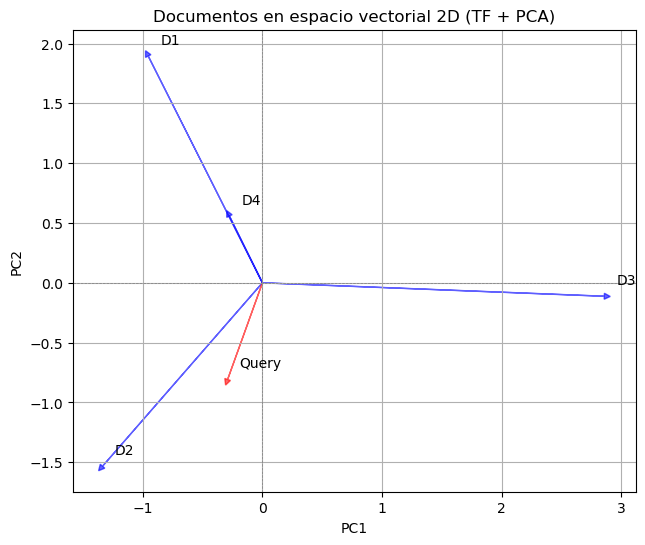

In [51]:
import matplotlib.pyplot as plt

# Etiquetas personalizadas
etiquetas = [f'D{i+1}' for i in range(len(documents))] + ['Query']

plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(docs_2d):
    label = etiquetas[i]
    color = 'red' if label == 'Query' else 'blue'
    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc=color, ec=color, alpha=0.6)
    plt.text(x + 0.1, y + 0.1, f'{label}', fontsize=10)

plt.title("Documentos en espacio vectorial 2D (TF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [19]:
matriz.to_csv("matriz_tf.csv", index=True)

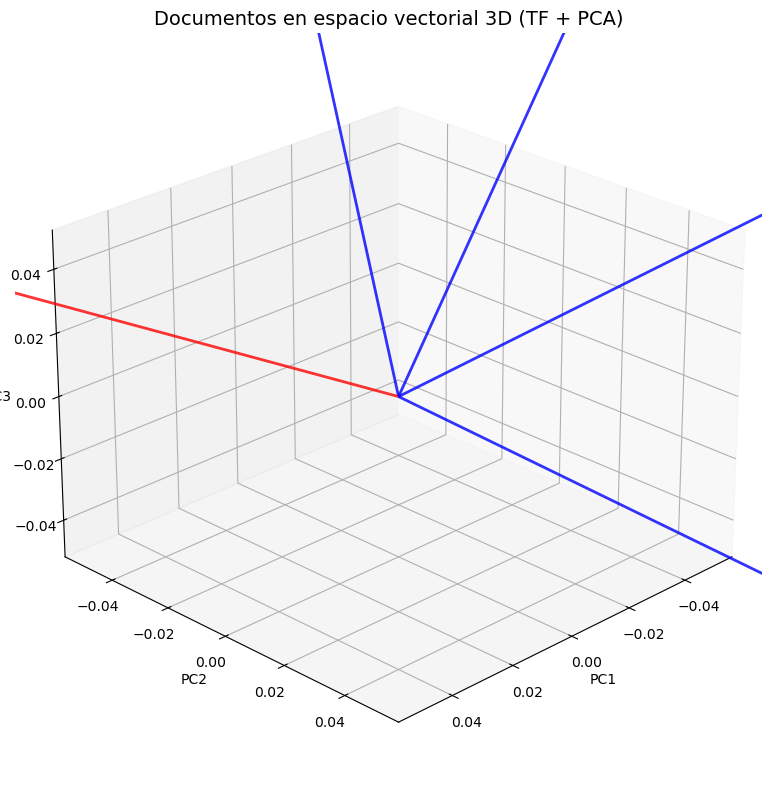

In [60]:
from mpl_toolkits.mplot3d import Axes3D

# Aplicamos PCA con 3 componentes
pca_3d = PCA(n_components=3)
docs_3d = pca_3d.fit_transform(matriz)

# Etiquetas personalizadas
etiquetas = [f'D{i+1}' for i in range(len(documents))] + ['Query']

# Gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujamos cada vector como una flecha desde el origen
for i, (x, y, z) in enumerate(docs_3d):
    label = etiquetas[i]
    color = 'red' if label == 'Query' else 'blue'
    
    ax.quiver(0, 0, 0, x, y, z, color=color, alpha=0.8, arrow_length_ratio=0.1, linewidth=2)
    ax.text(x, y, z, label, fontsize=10, color=color, weight='bold')

# Etiquetas de ejes y ajustes visuales
ax.set_title("Documentos en espacio vectorial 3D (TF + PCA)", fontsize=14)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.view_init(elev=25, azim=45)
plt.tight_layout()
plt.show()

### TF-IDF

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Corpus de documentos más la query al final
documents_with_query = documents + ["gato"]  # "gato" es tu query

# Vectorizador TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents_with_query)

In [62]:
import pandas as pd
matriz = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
matriz.index = [f'D{i+1}' for i in range(len(documents))] + ['Query']

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_2d = PCA(n_components=2)
docs_2d = pca_2d.fit_transform(matriz)

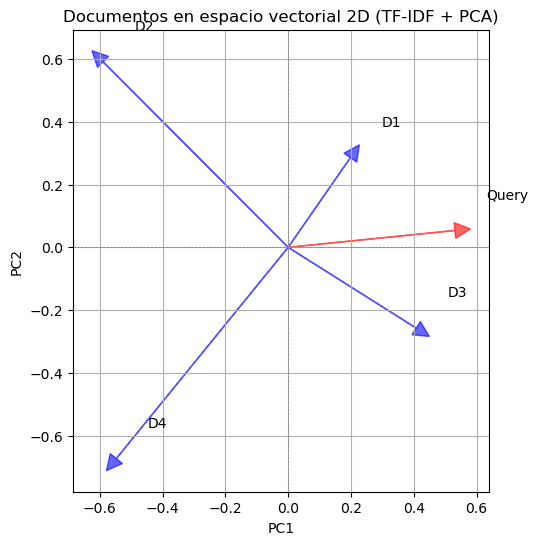

In [64]:
plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(docs_2d):
    label = matriz.index[i]
    color = 'red' if label == 'Query' else 'blue'
    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc=color, ec=color, alpha=0.6)
    plt.text(x + 0.1, y + 0.1, f'{label}', fontsize=10)

plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

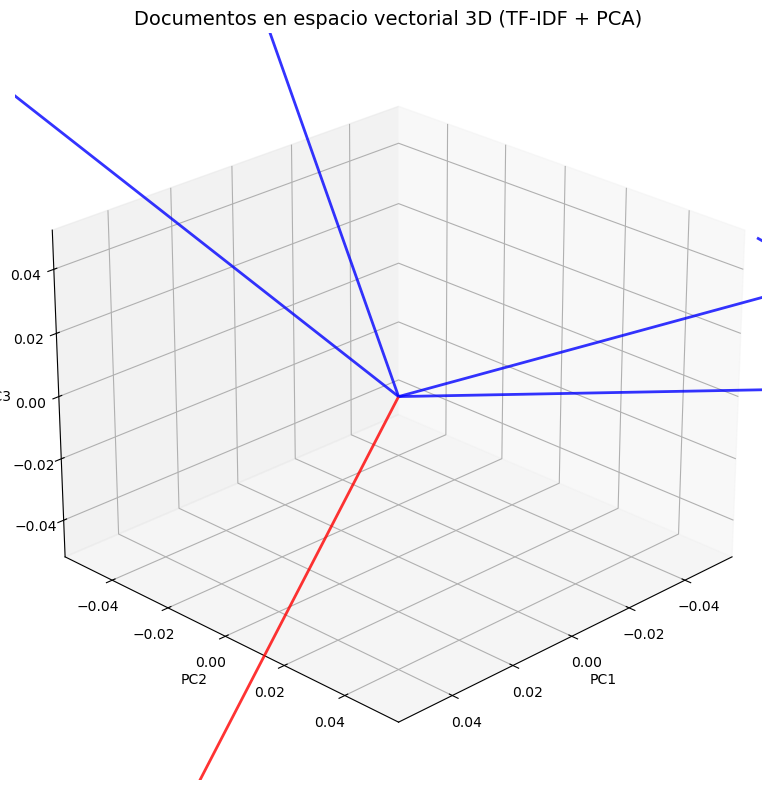

In [65]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
docs_3d = pca_3d.fit_transform(matriz)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, (x, y, z) in enumerate(docs_3d):
    label = matriz.index[i]
    color = 'red' if label == 'Query' else 'blue'
    
    ax.quiver(0, 0, 0, x, y, z, color=color, alpha=0.8, arrow_length_ratio=0.1, linewidth=2)
    ax.text(x, y, z, label, fontsize=10, color=color, weight='bold')

ax.set_title("Documentos en espacio vectorial 3D (TF-IDF + PCA)", fontsize=14)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.view_init(elev=25, azim=45)
plt.tight_layout()
plt.show()

## Parte 2: Representación de la consulta como vector

### Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizamos documentos + consulta juntos
documents_with_query = documents + ["gato en la cama"]
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents_with_query)

# Creamos DataFrame como antes
import pandas as pd
matriz = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
matriz.index = [f'D{i+1}' for i in range(len(documents))] + ['Query']

In [70]:
from sklearn.metrics.pairwise import cosine_similarity

# Separamos la query (última fila) y los documentos (todas menos la última)
query_vector = matriz.iloc[-1].values.reshape(1, -1)
docs_vectors = matriz.iloc[:-1].values

# Calculamos similitud coseno entre la query y todos los documentos
similitudes = cosine_similarity(query_vector, docs_vectors).flatten()

# Mostramos los resultados
for i, score in enumerate(similitudes):
    print(f"Similitud de Query: D{i+1}: {score:.4f}")

Similitud de Query: D1: 0.3672
Similitud de Query: D2: 0.2890
Similitud de Query: D3: 0.2597
Similitud de Query: D4: 0.1043


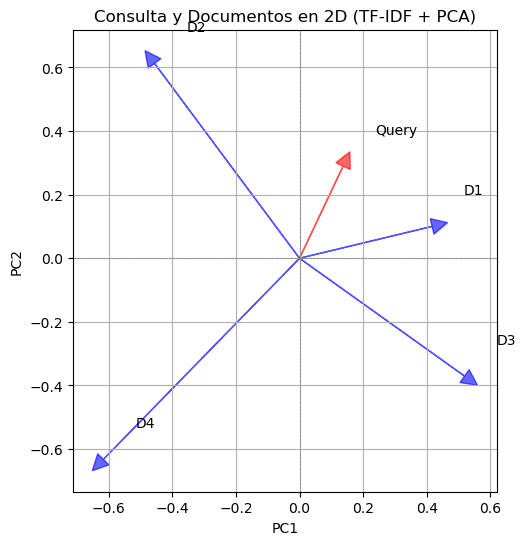

In [71]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicamos PCA sobre la matriz completa (documentos + query)
pca_2d = PCA(n_components=2)
docs_2d = pca_2d.fit_transform(matriz)

# Dibujamos
plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(docs_2d):
    label = matriz.index[i]
    color = 'red' if label == 'Query' else 'blue'
    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc=color, ec=color, alpha=0.6)
    plt.text(x + 0.1, y + 0.1, f'{label}', fontsize=10)

plt.title("Consulta y Documentos en 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


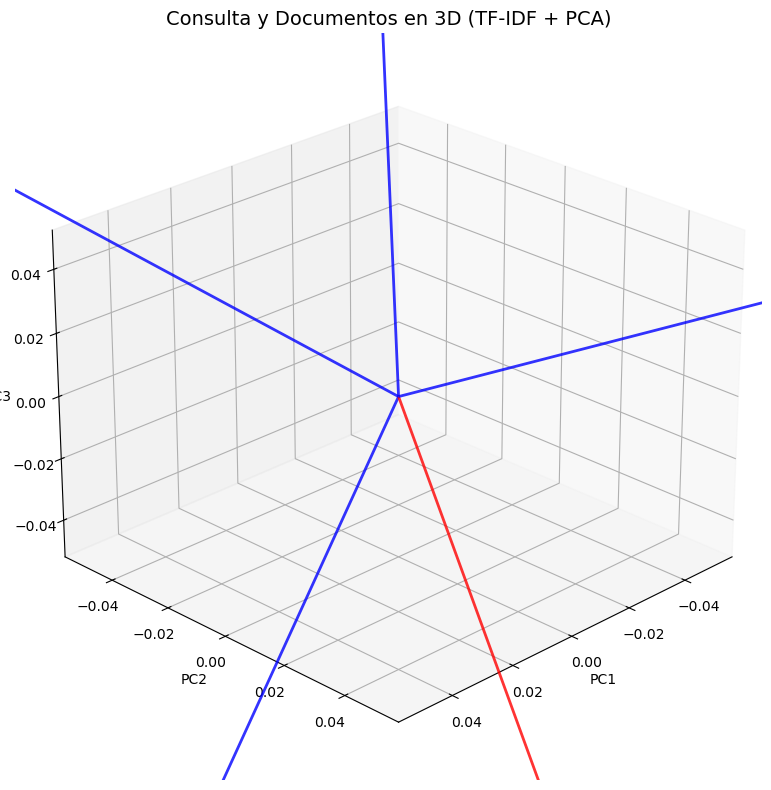

In [78]:
pca_3d = PCA(n_components=3)
docs_3d = pca_3d.fit_transform(matriz)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, (x, y, z) in enumerate(docs_3d):
    label = matriz.index[i]
    color = 'red' if label == 'Query' else 'blue'
    
    ax.quiver(0, 0, 0, x, y, z, color=color, alpha=0.8, arrow_length_ratio=0.1, linewidth=2)
    ax.text(x, y, z, label, fontsize=10, color=color, weight='bold')

ax.set_title("Consulta y Documentos en 3D (TF-IDF + PCA)", fontsize=14)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.view_init(elev=25, azim=45)
plt.tight_layout()
plt.show()

## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

def rank_documents(documents, query, top_k=3):
    # Unimos documentos + query
    corpus = documents + [query]

    # Vectorizamos con TF-IDF
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus)

    # Calculamos similitudes
    query_vector = tfidf_matrix[-1]  # Última fila = query
    docs_vectors = tfidf_matrix[:-1]  # Todas las demás = documentos

    similitudes = cosine_similarity(query_vector, docs_vectors).flatten()

    # Crear ranking
    ranking = sorted(
        [(f'D{i+1}', score) for i, score in enumerate(similitudes)],
        key=lambda x: x[1],
        reverse=True
    )

    return ranking, tfidf_matrix.toarray(), vectorizer.get_feature_names_out()

In [80]:
query = "gato en la cama"
ranking, tfidf_vectors, feature_names = rank_documents(documents, query)

# Mostrar ranking
for doc_id, sim in ranking:
    print(f"{doc_id}: Similitud = {sim:.4f}")

D1: Similitud = 0.3672
D2: Similitud = 0.2890
D3: Similitud = 0.2597
D4: Similitud = 0.1043


In [81]:
# Creamos matriz DataFrame con nombres
matriz = pd.DataFrame(tfidf_vectors, columns=feature_names)
matriz.index = [f'D{i+1}' for i in range(len(documents))] + ['Query']

# Reducimos a 2D
pca_2d = PCA(n_components=2)
docs_2d = pca_2d.fit_transform(matriz)

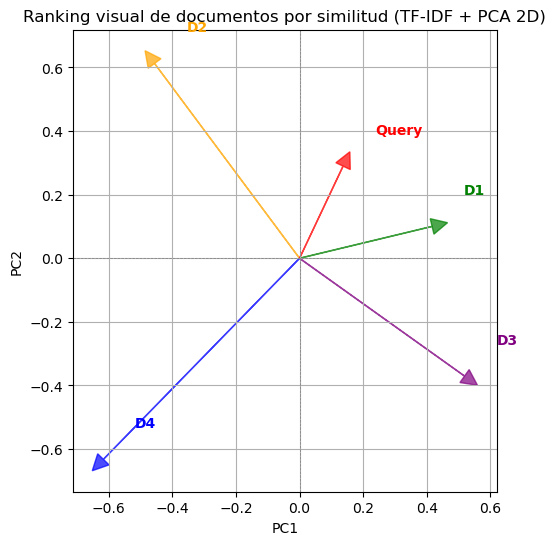

In [84]:
# Convertimos la matriz a DataFrame con etiquetas
matriz = pd.DataFrame(tfidf_vectors, columns=feature_names)
matriz.index = [f'D{i+1}' for i in range(len(documents))] + ['Query']

# Reducimos dimensiones a 2D
pca_2d = PCA(n_components=2)
docs_2d = pca_2d.fit_transform(matriz)

# Diccionario de colores por ranking
ranking_dict = {doc_id: i for i, (doc_id, _) in enumerate(ranking)}
colors = {
    0: 'green',   # Top 1
    1: 'orange',  # Top 2
    2: 'purple'   # Top 3
}

# Gráfico
plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(docs_2d):
    label = matriz.index[i]

    if label == 'Query':
        color = 'red'
    else:
        rank = ranking_dict.get(label, -1)
        color = colors.get(rank, 'blue')  # azul por defecto si no está en top 3

    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc=color, ec=color, alpha=0.7)
    plt.text(x + 0.1, y + 0.1, label, fontsize=10, color=color, weight='bold')

plt.title("Ranking visual de documentos por similitud (TF-IDF + PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

🟥 Query (rojo)

🟩 Documento más similar (Top 1) – verde

🟧 Top 2 – naranja

🟪 Top 3 – púrpura

🔵 Resto – azul